In [3]:
# Ethnicity labels
ETHNICITIES = { 
    0: "White", 
    1: "Black",
    2: "Asian",
    3: "Indian",
    4: "Hispanic"
}

# Gender labels
GENDERS = { 
    0: "Male", 
    1: "Female"
}


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image

# Get images

In [5]:
data=pd.read_csv('../raw_data/age_gender.csv')
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


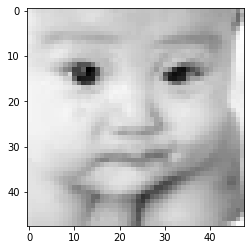

In [20]:
plt.imshow(np.array(data['pixels'][500].split(),dtype='float').reshape((48,48)),cmap='gray')

In [28]:
data['gender'][500]

0

In [43]:
def to_img_48_48(pixel):
    return np.array(pixel.split(),dtype='float').reshape((48,48))

def to_img_48_48_3(pixel):
    layer=to_img_48_48(pixel)
    return np.array(np.dstack([layer, layer, layer]),dtype='int')

def to_img_224_224(pixel):
    img=Image.fromarray(np.uint8(to_img_48_48(pixel)), 'L')
    new_size=(224,224)
    img=img.resize(new_size)
    img = img.getdata()
    image_array = np.array(img)
    image_array.resize(new_size)
    return image_array

def to_img_224_224_3(img_224_224):
    layer=img_224_224
    return np.array(np.dstack([layer, layer, layer]),dtype='int')

def from_dataframe_to_images(data,size=(224,224),kind="train",model="ethnicity"):
    for i in range(data.shape[0]):
        img=Image.fromarray(np.uint8(to_img_48_48(data['pixels'][i])), 'L')
        img=img.resize(size)
        path=f"../raw_data/all_images/{model}/{kind}/{data['ethnicity'][i]}/{i}-{data['age'][i]}-{data['gender'][i]}-{data['ethnicity'][i]}.jpg"
        img.save(path)

In [6]:
data=data.sample(2500).reset_index()

In [7]:
data['images']=data['pixels'].apply(to_img_224_224)


In [8]:
data['images_3']=data['images'].apply(to_img_224_224_3)

In [9]:
data.head()

,index,Unnamed: 0,age,ethnicity,gender,img_name,pixels,images,images_3
0,233,13671,35,0,0,20170117191246180.jpg.chip.jpg,83 100 127 169 203 217 223 237 241 231 229 224...,"[[81, 82, 83, 86, 88, 92, 97, 101, 107, 113, 1...","[[[81, 81, 81], [82, 82, 82], [83, 83, 83], [8..."
1,2476,9515,28,1,0,20170112211816014.jpg.chip.jpg,225 207 196 167 49 54 66 93 105 107 109 112 11...,"[[229, 228, 227, 224, 219, 214, 210, 206, 204,...","[[[229, 229, 229], [228, 228, 228], [227, 227,..."
2,1378,15083,39,1,0,20170113174626658.jpg.chip.jpg,132 118 97 67 57 67 80 78 72 76 88 84 70 65 65...,"[[134, 133, 132, 130, 127, 124, 120, 116, 112,...","[[[134, 134, 134], [133, 133, 133], [132, 132,..."
3,439,9986,29,1,0,20170113133331563.jpg.chip.jpg,96 49 30 28 25 26 23 40 77 102 108 113 108 106...,"[[99, 97, 93, 86, 76, 65, 54, 47, 41, 37, 34, ...","[[[99, 99, 99], [97, 97, 97], [93, 93, 93], [8..."
4,192,19733,56,0,1,20170104235032259.jpg.chip.jpg,44 58 63 56 40 38 32 18 34 109 151 172 176 189...,"[[43, 44, 45, 48, 51, 53, 57, 59, 61, 62, 62, ...","[[[43, 43, 43], [44, 44, 44], [45, 45, 45], [4..."


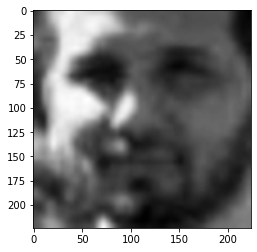

In [10]:
plt.imshow(data['images'][0],cmap='gray')

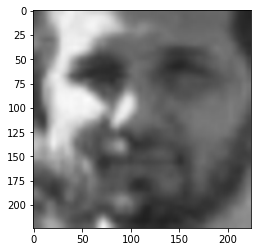

In [11]:
plt.imshow(data['images_3'][0],cmap='gray')

In [19]:
!ls ../raw_data/all_images

age_gender.csv	age_gender_light.csv


In [23]:
data.shape

(23705, 5)

In [30]:
data.columns

Index(['age', 'ethnicity', 'gender', 'img_name', 'pixels'], dtype='object')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data, data['ethnicity'], test_size=0.20, random_state=1)

In [36]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)

In [44]:
from_dataframe_to_images(X_train,size=(224,224),kind="train",model="ethnicity")

In [45]:
from_dataframe_to_images(X_test,size=(224,224),kind="test",model="ethnicity")

# Data viz

## Toolkit functions

In [12]:
def ethnicity_label(index):
    # Ethnicity labels
    ETHNICITIES = { 
        0: "White", 
        1: "Black",
        2: "Asian",
        3: "Indian",
        4: "Hispanic"
    }

    return ETHNICITIES[index]

def gender_label(index):
    # Gender labels
    GENDERS = { 
        0: "Male", 
        1: "Female"
    }

    return GENDERS[index]

def get_label(df):
    df['ethnicity_label']=df['ethnicity'].map(ethnicity_label)
    df['gender_label']=df['gender'].map(gender_label)
    return df

def display_feature(df,feature_name):
    '''Display a countplot based on seaborn with a "whitegrid" style'''
    fig = plt.figure(figsize=(10,6))
    sns.set_style("whitegrid")
    ax = sns.countplot(x=df[feature_name],
                       order=df[feature_name].value_counts(ascending=False).index);

    abs_values = df[feature_name].value_counts(ascending=False).values

    ax.bar_label(container=ax.containers[0], labels=abs_values)

## Playing with data

In [13]:
data=get_label(data)
data.head()

,index,age,ethnicity,gender,img_name,pixels,images,images_3,ethnicity_label,gender_label
0,22855,8,0,1,20170104005606487.jpg.chip.jpg,8 9 15 33 52 65 70 75 83 91 98 105 109 108 110...,"[[8, 8, 8, 8, 8, 8, 9, 9, 10, 11, 13, 15, 17, ...","[[[8, 8, 8], [8, 8, 8], [8, 8, 8], [8, 8, 8], ...",White,Female
1,15116,39,1,0,20170117185039604.jpg.chip.jpg,229 210 140 72 74 75 74 70 65 64 64 62 62 64 6...,"[[230, 229, 228, 227, 225, 221, 215, 206, 194,...","[[[230, 230, 230], [229, 229, 229], [228, 228,...",Black,Male
2,3804,22,2,1,20170116170405273.jpg.chip.jpg,0 0 0 0 4 64 129 22 12 13 12 11 12 9 14 18 29 ...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Asian,Female
3,23059,82,0,1,20170109150955073.jpg.chip.jpg,199 174 144 159 172 165 147 138 151 150 162 18...,"[[203, 202, 200, 195, 190, 184, 176, 170, 162,...","[[[203, 203, 203], [202, 202, 202], [200, 200,...",White,Female
4,22577,78,1,0,20170117193425610.jpg.chip.jpg,142 120 95 87 74 73 55 51 46 57 55 58 61 61 70...,"[[146, 145, 143, 138, 134, 129, 123, 117, 112,...","[[[146, 146, 146], [145, 145, 145], [143, 143,...",Black,Male


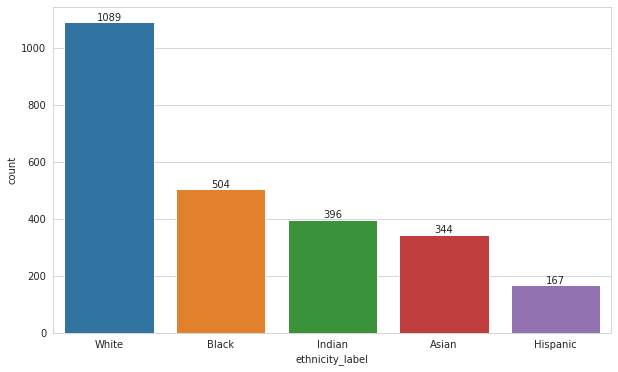

In [14]:
display_feature(data,'ethnicity_label')

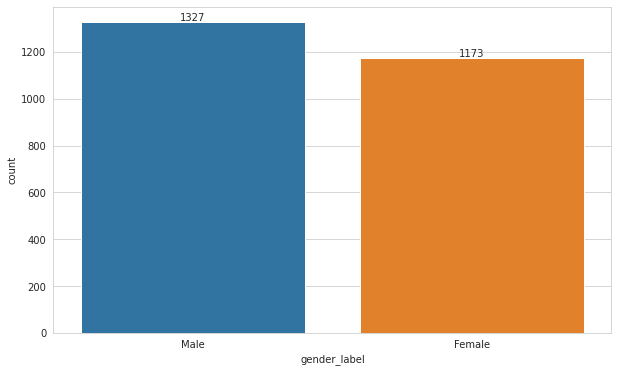

In [15]:
display_feature(data,'gender_label')

# Compute baseline

## Ethnicity gender

In [16]:
import random

In [17]:
data['test_gender']=0==data['gender']
data.head()

,index,age,ethnicity,gender,img_name,pixels,images,images_3,ethnicity_label,gender_label,test_gender
0,22855,8,0,1,20170104005606487.jpg.chip.jpg,8 9 15 33 52 65 70 75 83 91 98 105 109 108 110...,"[[8, 8, 8, 8, 8, 8, 9, 9, 10, 11, 13, 15, 17, ...","[[[8, 8, 8], [8, 8, 8], [8, 8, 8], [8, 8, 8], ...",White,Female,False
1,15116,39,1,0,20170117185039604.jpg.chip.jpg,229 210 140 72 74 75 74 70 65 64 64 62 62 64 6...,"[[230, 229, 228, 227, 225, 221, 215, 206, 194,...","[[[230, 230, 230], [229, 229, 229], [228, 228,...",Black,Male,True
2,3804,22,2,1,20170116170405273.jpg.chip.jpg,0 0 0 0 4 64 129 22 12 13 12 11 12 9 14 18 29 ...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Asian,Female,False
3,23059,82,0,1,20170109150955073.jpg.chip.jpg,199 174 144 159 172 165 147 138 151 150 162 18...,"[[203, 202, 200, 195, 190, 184, 176, 170, 162,...","[[[203, 203, 203], [202, 202, 202], [200, 200,...",White,Female,False
4,22577,78,1,0,20170117193425610.jpg.chip.jpg,142 120 95 87 74 73 55 51 46 57 55 58 61 61 70...,"[[146, 145, 143, 138, 134, 129, 123, 117, 112,...","[[[146, 146, 146], [145, 145, 145], [143, 143,...",Black,Male,True


In [18]:
data.test_gender.mean()

0.5308

In [19]:
def compute_gender_baseline(df):
    df['test_gender']=(data['gender']==0)
    return df['test_gender'].mean()

In [20]:
compute_gender_baseline(data)

0.5308

# CNN model

## Preprocessing

In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory

2022-05-31 11:42:59.027766: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-31 11:42:59.027839: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [12]:
directory='../raw_data/all_images/ethnicity/train/'
validation=image_dataset_from_directory(directory,
                                   labels='inferred',
                                   label_mode='categorical',
                                   image_size=(224, 224),
                                   validation_split=0.2,
                                   subset="validation",
                                   seed=42)
train=image_dataset_from_directory(directory,
                                   labels='inferred',
                                   label_mode='categorical',
                                   image_size=(224, 224),
                                   validation_split=0.2,
                                   subset="training",
                                   seed=42)

Found 18964 files belonging to 5 classes.
Using 3792 files for validation.
Found 18964 files belonging to 5 classes.
Using 15172 files for training.


In [3]:
### Regularizers
reg_l1 = regularizers.L1(0.01)
reg_l2 = regularizers.L2(0.01)
reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)

In [4]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

def load_model():
    model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    return model

def set_nontrainable_layers(model):
    # Set the first layers to be untrainable
    model.trainable = False
    return model

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer_1 = layers.Dense(100, activation='relu')
    dense_layer_2 = layers.Dense(100, activation='relu')
    dense_layer_3 = layers.Dense(100, activation='relu')
    dense_layer_4 = layers.Dense(100, activation='relu')
    dense_layer_5 = layers.Dense(100, activation='relu')
    dropout_layer = layers.Dropout(0.2)
    prediction_layer = layers.Dense(5, activation='softmax')
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer_1,
        prediction_layer
    ])
    return model

def build_model():  
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

In [5]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 100)               10035300  
                                                                 
 dense_5 (Dense)             (None, 5)                 505       
                                                                 
Total params: 33,623,517
Trainable params: 10,035,805
Non-trainable params: 23,587,712
_________________________________________________________________


In [13]:
train = train.map(lambda x, y: (preprocess_input(x), y))
validation = validation.map(lambda x, y: (preprocess_input(x), y))

In [1]:
model = build_model()

es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 3, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model.fit(train,
                    validation_data=validation,
                    epochs=50, 
                    batch_size=32,
                    validation_batch_size=32,
                    callbacks=[es])

NameError: name 'build_model' is not defined